# Weather Prediction Model

### Rukhshan Alam

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
weather = pd.read_csv('local_weather.csv')

In [109]:
pd.set_option('display.max_columns', None)
weather.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WSF1,WSF2,WSF5,WSFG,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,49.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,49.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,54.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,54.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,55.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [110]:
weather = weather.set_index('DATE')

In [111]:
weather.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'DAPR', 'FMTM', 'FRGT',
       'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN',
       'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT09', 'WT16', 'WT18'],
      dtype='object')

## Primary columns to look into are:

### PRCP — total precipitation
### TMAX — maximum daily temperature
### TMIN — minimum daily temperature
### SNOW — the total daily snowfall
### SNWD — total snow depth on the ground


In [112]:
primary_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']]

In [113]:
primary_weather

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


In [114]:
# Renaming columns 

In [115]:
primary_weather.rename({'PRCP':'total_Precipitation', 'TMAX':'max_Daily_Temp', 'TMIN':'min_Daily_Temp', 'SNOW':'total_Daily_Snow', 'SNWD':'total_Snow_Depth'},
                       axis = 1, inplace = True)

/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_5308/2498203494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_weather.rename({'PRCP':'total_Precipitation', 'TMAX':'max_Daily_Temp', 'TMIN':'min_Daily_Temp', 'SNOW':'total_Daily_Snow', 'SNWD':'total_Snow_Depth'},


In [116]:
primary_weather

,total_Precipitation,total_Daily_Snow,total_Snow_Depth,max_Daily_Temp,min_Daily_Temp
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


In [117]:
primary_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_Precipitation  16578 non-null  float64
 1   total_Daily_Snow     11380 non-null  float64
 2   total_Snow_Depth     11504 non-null  float64
 3   max_Daily_Temp       16850 non-null  float64
 4   min_Daily_Temp       16849 non-null  float64
dtypes: float64(5)
memory usage: 790.3+ KB


## Performing data cleaning tasks

### Dealing with missing values

In [118]:
# filling Nan values with 0 
primary_weather.fillna(0)

,total_Precipitation,total_Daily_Snow,total_Snow_Depth,max_Daily_Temp,min_Daily_Temp
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,0.0,0.0,60.0,39.0
2022-01-25,0.0,0.0,0.0,57.0,43.0
2022-01-26,0.0,0.0,0.0,57.0,41.0


In [119]:
(primary_weather['total_Precipitation'] == 0).value_counts()

True     13664
False     3195
Name: total_Precipitation, dtype: int64

In [120]:
(primary_weather['total_Daily_Snow'] > 0).value_counts()

False    16858
True         1
Name: total_Daily_Snow, dtype: int64

In [121]:
(primary_weather['total_Snow_Depth'] > 0).value_counts()

False    16859
Name: total_Snow_Depth, dtype: int64

In [122]:
primary_weather['min_Daily_Temp'].isnull().sum()

10

In [123]:
primary_weather['max_Daily_Temp'].isnull().sum()

9

#### total_Precipitation — total precipitation have 13945 values = 0        
#### max_Daily_Temp — maximum daily temperature have only 9 values = 0
#### min_Daily_Temp — minimum daily temperature have only 10 values = 0
#### total_Daily_Snow — the total daily snowfall is missing 16858 out of 16859, it is not worth keeping.
#### total_Snow_Depth — total snow depth on the ground is missing 16859 out of 16859, it is not worth keeping.


### DROPING total_Snow_Depth and total_Daily_Snow columns

In [124]:
primary_weather = primary_weather.drop(['total_Snow_Depth', 'total_Daily_Snow'], axis = 1)

In [125]:
primary_weather

,total_Precipitation,max_Daily_Temp,min_Daily_Temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [126]:
# using forward fill method to fill msiisng values in min and max daily temperature
primary_weather = primary_weather.fillna(method='ffill')

In [127]:
primary_weather['min_Daily_Temp'].isnull().sum()

0

In [128]:
primary_weather['max_Daily_Temp'].isnull().sum()

0

In [129]:
primary_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_Precipitation  16859 non-null  float64
 1   max_Daily_Temp       16859 non-null  float64
 2   min_Daily_Temp       16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


### Converting index 'DATE' to  datetime 

In [130]:
primary_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [131]:
primary_weather.index = pd.to_datetime(primary_weather.index)

In [132]:
primary_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

## Exploring primary_weather Dataframe 

plotting max_Temp and min_Temp to visualize weather trends

<AxesSubplot:xlabel='DATE'>

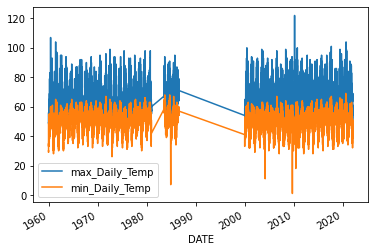

In [133]:
primary_weather[['max_Daily_Temp', 'min_Daily_Temp']].plot()

Looks like we are missing some data between year 1990 and 2000

### plotting 'total_Precipitation' to visualize missing data 

<AxesSubplot:xlabel='DATE', ylabel='total_Precipitation'>

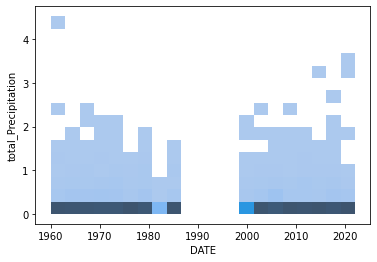

In [134]:
sns.histplot(data = primary_weather, x = 'DATE', y = 'total_Precipitation')

<AxesSubplot:xlabel='DATE', ylabel='Density'>

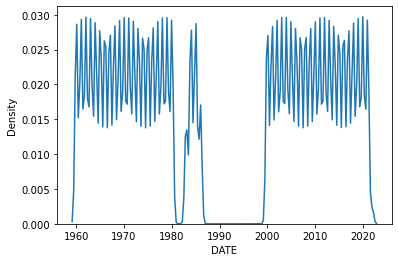

In [135]:
sns.kdeplot(primary_weather.index.year, bw_adjust= 0.1)

### Creating a new column for prediction model

In [136]:
primary_weather['target'] = primary_weather['max_Daily_Temp'].shift(-1)

In [137]:
primary_weather

,total_Precipitation,max_Daily_Temp,min_Daily_Temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [138]:
primary_weather.corr()['target']

total_Precipitation   -0.206608
max_Daily_Temp         0.822091
min_Daily_Temp         0.597027
target                 1.000000
Name: target, dtype: float64

In [139]:
# deleting last row from Dataframe
primary_weather = primary_weather.iloc[:-1]

In [140]:
primary_weather

,total_Precipitation,max_Daily_Temp,min_Daily_Temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


# Performing Machine Learning Task

## Splitting data into feature values and target values

In [141]:
# Feature Vector
X = primary_weather.drop('target', axis = 1)

In [142]:
# Prediction vector
y = primary_weather['target']

### Permorming Train|Test split

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [145]:
# scaling data to resize data distribution
from sklearn.preprocessing import StandardScaler

In [146]:
scalar = StandardScaler()

In [147]:
scalar.fit(X_train)

StandardScaler()

In [148]:
X_train_sc = scalar.transform(X_train)
X_test_sc = scalar.transform(X_test)

#### using Ridge linear model for model prediction

In [149]:
from sklearn.linear_model import Ridge

In [150]:
model = Ridge(alpha=0.1)

In [151]:
# fitting data 
model.fit(X_train_sc, y_train)

Ridge(alpha=0.1)

In [152]:
# performing prediction task
model_pred = model.predict(X_test_sc)

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [154]:
# mean_absolute_error
MAE = mean_absolute_error(model_pred, y_test)

In [155]:
MAE

3.391493285042333

Average error in our prediction model is 3.39

In [156]:
# mean_squared_error
MSE = mean_squared_error(model_pred, y_test)

In [157]:
combined = pd.concat([y_test, pd.Series(model_pred, index = X_test.index)], axis = 1)
combined.columns = ['target', 'predict']

In [158]:
combined

,target,predict
DATE,,
2013-03-01,68.0,69.232114
1970-02-20,62.0,65.690543
2015-08-22,73.0,74.393464
2009-02-28,62.0,62.718298
1986-04-07,69.0,66.551219
...,...,...
2016-09-26,84.0,87.610872
1962-01-08,73.0,71.167281
2016-05-11,66.0,67.208746


<AxesSubplot:xlabel='DATE'>

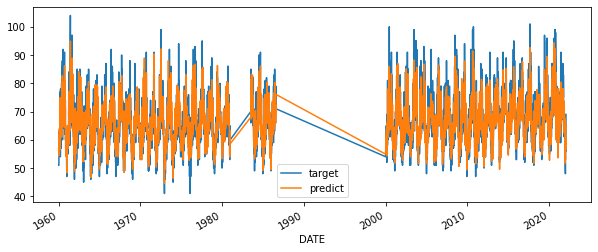

In [159]:
combined.plot(figsize = (10, 4))

In [160]:
combined['differ'] = (combined['target'] - combined['predict']).abs()
combined.sort_values('differ', ascending=False)

,target,predict,differ
DATE,,,
1961-06-13,104.0,76.088068,27.911932
2020-09-26,99.0,77.555484,21.444516
2010-08-22,95.0,73.963125,21.036875
2009-09-24,79.0,58.048737,20.951263
1969-05-04,87.0,66.968183,20.031817
...,...,...,...
2020-05-13,69.0,69.004926,0.004926
1961-03-05,57.0,57.004854,0.004854
1976-06-08,64.0,63.995938,0.004062


Our model is not best suited for outliers like sudden change in climate, but in most cases it is performing well


#### defining function for prediction model for user convinence 

In [161]:
def prediction_model(X, primary_weather, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    scalar.fit(X_train)
    X_train_sc = scalar.transform(X_train)
    X_test_sc = scalar.transform(X_test)
    model.fit(X_train_sc, y_train)
    model_pred = model.predict(X_test_sc)
    error = mean_absolute_error(model_pred, y_test)
    sq_error = mean_squared_error(model_pred, y_test)
    pred_comb = pd.concat([y_test, pd.Series(model_pred, index = X_test.index)], axis = 1)
    pred_comb.columns = ['target', 'prediction']
    return error, sq_error, combined


In [162]:
#### Adding features to improve model outcome

In [163]:
primary_weather["month_max"] = primary_weather["max_Daily_Temp"].rolling(30).mean()

primary_weather["month_day_max"] = primary_weather["month_max"] / primary_weather["max_Daily_Temp"]

primary_weather["max_min"] = primary_weather["max_Daily_Temp"] / primary_weather["min_Daily_Temp"]

#primary_weather["week_max"] = primary_weather["max_Daily_Temp"].rolling(7).mean()


/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_5308/2873650315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_weather["month_max"] = primary_weather["max_Daily_Temp"].rolling(30).mean()
/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_5308/2873650315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_weather["month_day_max"] = primary_weather["month_max"] / primary_weather["max_Daily_Temp"]
/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_5308/2873650315

In [164]:
primary_weather = primary_weather.iloc[30:,:]


In [165]:
primary_weather

,total_Precipitation,max_Daily_Temp,min_Daily_Temp,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [166]:
X = primary_weather.drop('target', axis = 1)

In [167]:
y = primary_weather['target']

In [168]:
error, sq_error, pred_comb = prediction_model(X, primary_weather, model)

In [169]:
error

3.3932361819024406

In [170]:
sq_error


20.924838416350255

In [171]:
# model = Ridge(alpha=0.1)

In [172]:
pred_comb.columns = ['target', 'prediction', 'difference']


In [173]:
pred_comb.sort_values('difference', ascending = False)

,target,prediction,difference
DATE,,,
1961-06-13,104.0,76.088068,27.911932
2020-09-26,99.0,77.555484,21.444516
2010-08-22,95.0,73.963125,21.036875
2009-09-24,79.0,58.048737,20.951263
1969-05-04,87.0,66.968183,20.031817
...,...,...,...
2020-05-13,69.0,69.004926,0.004926
1961-03-05,57.0,57.004854,0.004854
1976-06-08,64.0,63.995938,0.004062


In [174]:
pred_comb['difference'] = (pred_comb['target'] - pred_comb['prediction']).abs()

In [175]:
primary_weather['avg_monthly'] = primary_weather["max_Daily_Temp"].groupby(primary_weather.index.month).apply(lambda x: x.expanding(1).mean())


/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_5308/1678173815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_weather['avg_monthly'] = primary_weather["max_Daily_Temp"].groupby(primary_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [176]:
primary_weather["avg_daily"] = primary_weather["max_Daily_Temp"].groupby(primary_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_5308/3779239517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_weather["avg_daily"] = primary_weather["max_Daily_Temp"].groupby(primary_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [177]:
primary_weather

,total_Precipitation,max_Daily_Temp,min_Daily_Temp,target,month_max,month_day_max,max_min,avg_monthly,avg_daily
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,57.347826


In [178]:
X = primary_weather.drop('target', axis = 1)

In [179]:
y = primary_weather['target']

In [180]:
error, sq_error,pred_comb = prediction_model(X, primary_weather, model)

In [181]:
error

3.374117025984526

In [182]:
sq_error

20.947868985947338

## due to random sampling this model will not perform well on sudden climate change 
#### we will switch to date range data split and see how well model performs

In [183]:
# training data
train = primary_weather.loc[:'2020-12-31']

In [184]:
# test data
test = primary_weather.loc['2021-01-01':, :]

In [185]:
train

,total_Precipitation,max_Daily_Temp,min_Daily_Temp,target,month_max,month_day_max,max_min,avg_monthly,avg_daily
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0,63.600000,1.009524,1.431818,56.694464,55.511111
2020-12-28,0.10,61.0,42.0,60.0,63.500000,1.040984,1.452381,56.697557,55.933333
2020-12-29,0.00,60.0,39.0,56.0,63.366667,1.056111,1.538462,56.699928,55.444444


In [186]:
test

,total_Precipitation,max_Daily_Temp,min_Daily_Temp,target,month_max,month_day_max,max_min,avg_monthly,avg_daily
DATE,,,,,,,,,
2021-01-01,0.00,60.0,40.0,57.0,62.833333,1.047222,1.500000,56.636896,55.355556
2021-01-02,0.14,57.0,51.0,56.0,62.533333,1.097076,1.117647,56.637162,54.644444
2021-01-03,0.00,56.0,49.0,62.0,62.200000,1.110714,1.142857,56.636696,55.000000
2021-01-04,0.36,62.0,46.0,59.0,62.133333,1.002151,1.347826,56.640614,55.644444
2021-01-05,0.00,59.0,42.0,59.0,61.966667,1.050282,1.404762,56.642336,55.533333
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,57.347826


In [220]:
primary_weather.corr()['target']

total_Precipitation   -0.206351
max_Daily_Temp         0.821650
min_Daily_Temp         0.596016
target                 1.000000
month_max              0.686842
month_day_max         -0.421537
max_min                0.045228
avg_monthly            0.689805
avg_daily              0.712334
Name: target, dtype: float64

In [187]:
X_train_final = train.drop('target', axis = 1)

In [188]:
y_train_final = train['target']

In [189]:
X_test_final = test.drop('target', axis = 1)

In [190]:
y_test_final = test['target']

In [191]:
scalar.fit(X_train_final)
X_train_sc = scalar.transform(X_train_final)
X_test_sc = scalar.transform(X_test_final)
model.fit(X_train_sc, y_train_final)
model_pred_final = model.predict(X_test_sc)
error = mean_absolute_error(model_pred_final, y_test_final)
sq_error = mean_squared_error(model_pred_final, y_test_final)

In [192]:
error

3.318063344118813

In [193]:
sq_error

19.384340900791138

In [194]:
pred_comb_final = pd.concat([y_test_final, pd.Series(model_pred_final, index = X_test_final.index)], axis = 1)
pred_comb_final.columns = ['target', 'prediction']

In [195]:
pred_comb_final

,target,prediction
DATE,,
2021-01-01,57.0,59.569921
2021-01-02,56.0,57.599903
2021-01-03,62.0,56.962560
2021-01-04,59.0,60.731155
2021-01-05,59.0,58.899235
...,...,...
2022-01-23,60.0,59.347577
2022-01-24,57.0,59.309806
2022-01-25,57.0,57.432200


<AxesSubplot:xlabel='DATE'>

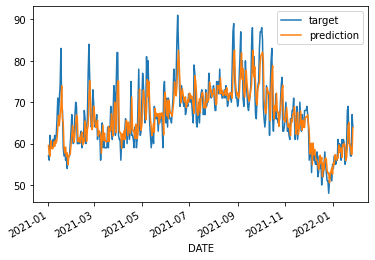

In [202]:
pred_comb_final.plot()

In [203]:
pred_comb_final['difference'] = (pred_comb_final['target'] - pred_comb_final['prediction']).abs()

In [204]:
pred_comb_final.sort_values('difference', ascending=False)

,target,prediction,difference
DATE,,,
2021-01-17,83.0,68.589402,14.410598
2021-05-07,81.0,67.778050,13.221950
2021-04-01,62.0,75.167166,13.167166
2021-02-22,84.0,71.166047,12.833953
2021-10-16,66.0,78.821614,12.821614
...,...,...,...
2021-07-24,70.0,69.956172,0.043828
2022-01-06,56.0,55.969164,0.030836
2021-08-06,74.0,74.030809,0.030809


###### We analyse that the model has improved alot by switch to range train|test split from randomstate split
In random state split largest the difference was 27, and in range split the largest difference is 14.